In [1]:
!pip install pandas

In [2]:
import pandas as pd
purchase_behaviour = pd.read_csv('purchase_behaviour.csv')
transaction_data = pd.read_csv('transaction_data.csv')

In [3]:
#identify top3 most profitable products
top_profitable_products=(transaction_data.groupby(['PROD_NBR','PROD_NAME'])['TOT_SALES'].sum().reset_index().sort_values(by="TOT_SALES", ascending=False))
top_3_profitable_products = top_profitable_products.head(3)
print(top_3_profitable_products)

    PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


In [5]:
#identify most loyal customers
customer_transactions = transaction_data.merge(purchase_behaviour,on='LYLTY_CARD_NBR',how='left')
loyal_customers = (
    customer_transactions.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
)
print(loyal_customers.head(3))

                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
6          OLDER FAMILIES           Budget  168363.25
19  YOUNG SINGLES/COUPLES       Mainstream  157621.60
13               RETIREES       Mainstream  155677.05


Now we will be analyzing characteristics of our loyal customers:
Loyal customers are:
1.Older Families (Budget buyers) 
2.Young Singles/Couples (Mainstream buyers) 
3.Retirees (Mainstream buyers) 

In [7]:
#Budget For Older Families
# Filter data for 'Older Families' and 'Budget Buyers'
older_families_budget = customer_transactions[
    (customer_transactions["LIFESTAGE"] == "OLDER FAMILIES") &
    (customer_transactions["PREMIUM_CUSTOMER"] == "Budget")
]

# Total spending by Older Families (Budget Buyers)
total_spending = older_families_budget["TOT_SALES"].sum()
print(f"Total Spending by Older Families : ${total_spending:.2f}")


Total Spending by Older Families : $168363.25


In [9]:
# Identify the most purchased products by Older Families (Budget Buyers)
top_products = (
    older_families_budget.groupby("PROD_NAME")["PROD_QTY"]
    .sum()
    .reset_index()
    .sort_values(by="PROD_QTY", ascending=False)
)

# Display top 5 products
print(top_products.head())


                                    PROD_NAME  PROD_QTY
33     Kettle Mozzarella   Basil & Pesto 175g       561
77   Smiths Crinkle Chips Salt & Vinegar 330g       559
15    Doritos Corn Chips  Cheese Supreme 170g       558
95       Thins Potato Chips  Hot & Spicy 175g       549
100           Twisties Cheese     Burger 250g       544


The analysis confirms that Older Families (Budget Buyers) prefer medium-to-large pack sizes (175g, 250g, 330g), indicating a tendency to buy in bulk for household consumption rather than individual snacking. Their high spending suggests they are cost-conscious but prioritize value-for-money options, as larger packs often provide better value per gram and their budget of $168363.25 confirms that  they are among the highest spenders.

In [11]:
#Budget for young singles /couples
# Filter transaction data for Young Singles/Couples (Mainstream Buyers)
young_singles_mainstream = customer_transactions[
    (customer_transactions["LIFESTAGE"] == "YOUNG SINGLES/COUPLES") &
    (customer_transactions["PREMIUM_CUSTOMER"] == "Mainstream")
]

# Total spending by Young Singles/Couples (Mainstream Buyers)
total_spending = young_singles_mainstream["TOT_SALES"].sum()
print(f"Total Spending: ${total_spending:.2f}")



Total Spending: $157621.60


In [12]:
# Identify most purchased products
top_products = (
    young_singles_mainstream.groupby("PROD_NAME")["PROD_QTY"]
    .sum()
    .reset_index()
    .sort_values(by="PROD_QTY", ascending=False)
)

print(top_products.head())  # Display top 5 purchased products


                                   PROD_NAME  PROD_QTY
33    Kettle Mozzarella   Basil & Pesto 175g       626
15   Doritos Corn Chips  Cheese Supreme 170g       621
98             Tostitos Splash Of  Lime 175g       619
42  Kettle Tortilla ChpsHny&Jlpno Chili 150g       604
86    Smiths Crnkle Chip  Orgnl Big Bag 380g       596


The most purchased products by Young Singles/Couples (Mainstream Buyers) provide strong evidence that they prefer premium snack items for social gatherings, convenience, or indulgence

In [30]:
# Group by LIFESTAGE and PREMIUM_CUSTOMER and count the number of purchases
total_purchases_by_segment = customer_transactions.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].count().reset_index()

# Rename column for clarity
total_purchases_by_segment = total_purchases_by_segment.rename(columns={"LYLTY_CARD_NBR": "TOTAL_PURCHASES"})

# Sort by total purchases in descending order
total_purchases_by_segment = total_purchases_by_segment.sort_values(by="TOTAL_PURCHASES", ascending=False)

# Display the result
print(total_purchases_by_segment)


                 LIFESTAGE PREMIUM_CUSTOMER  TOTAL_PURCHASES
6           OLDER FAMILIES           Budget            23160
13                RETIREES       Mainstream            21466
19   YOUNG SINGLES/COUPLES       Mainstream            20854
15          YOUNG FAMILIES           Budget            19122
9    OLDER SINGLES/COUPLES           Budget            18407
10   OLDER SINGLES/COUPLES       Mainstream            18318
11   OLDER SINGLES/COUPLES          Premium            17754
12                RETIREES           Budget            15201
7           OLDER FAMILIES       Mainstream            14244
14                RETIREES          Premium            13096
16          YOUNG FAMILIES       Mainstream            12907
1   MIDAGE SINGLES/COUPLES       Mainstream            11874
17          YOUNG FAMILIES          Premium            11563
8           OLDER FAMILIES          Premium            11192
18   YOUNG SINGLES/COUPLES           Budget             9242
2   MIDAGE SINGLES/COUPL

Mainstream Retirees rank 2nd in total purchases with 21,466 transactions, just behind Older Families (Budget) at 23,160. This suggests that retirees in the mainstream segment shop frequently, likely due to More Free Time for Shopping: Retired individuals have more flexibility in their schedules, allowing them to shop frequently.

In [27]:
total_spend = mainstream_retirees["TOT_SALES"].sum()
print(f"Total spend by Mainstream Retirees: ${total_spend}")

Total spend by Mainstream Retirees: $155677.05


In [13]:
!pip install matplotlib


Analysis of Purchase Frequency Across Customer Segments

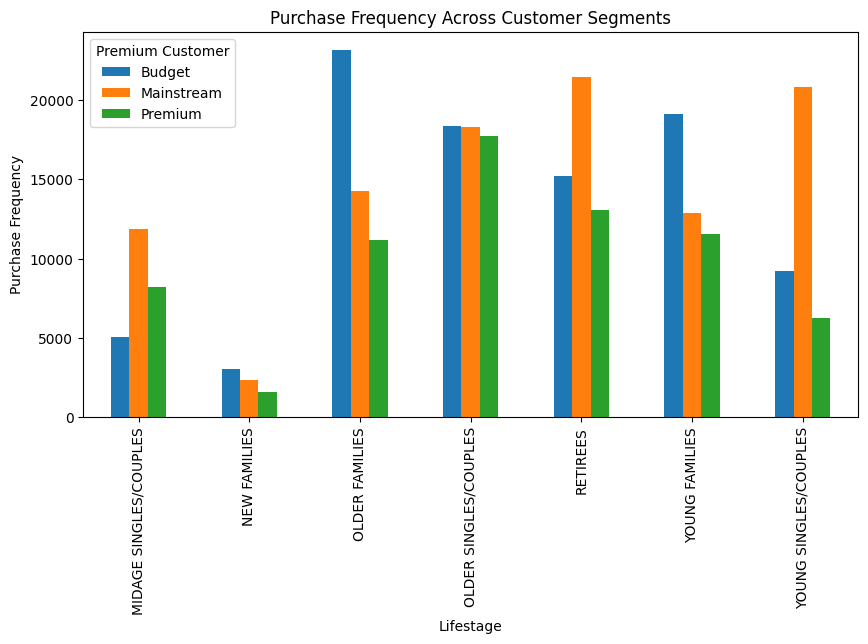

In [35]:
import matplotlib.pyplot as plt

# Group by LIFESTAGE and PREMIUM_CUSTOMER and count purchases
purchase_freq = customer_transactions.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].count().unstack()

# Plot bar chart
purchase_freq.plot(kind="bar", figsize=(10, 5))

# Labels & formatting
plt.xlabel("Lifestage")
plt.ylabel("Purchase Frequency")
plt.title("Purchase Frequency Across Customer Segments")
plt.legend(title="Premium Customer")
plt.show()


In [34]:
import pandas as pd

# Group by LIFESTAGE and PREMIUM_CUSTOMER, then count the number of transactions
most_loyal = customer_transactions.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"].count().reset_index()

# Sort in descending order to find the segment with the highest purchase frequency
most_loyal = most_loyal.sort_values(by="LYLTY_CARD_NBR", ascending=False)

# Display the most loyal customer segment
print("Most Loyal Customer Segment:")
print(most_loyal.head())  # Display the top segment


Most Loyal Customer Segment:
                LIFESTAGE PREMIUM_CUSTOMER  LYLTY_CARD_NBR
6          OLDER FAMILIES           Budget           23160
13               RETIREES       Mainstream           21466
19  YOUNG SINGLES/COUPLES       Mainstream           20854
15         YOUNG FAMILIES           Budget           19122
9   OLDER SINGLES/COUPLES           Budget           18407


This  means that customers who make frequent purchases also tend to spend the most, reinforcing the idea that increasing purchase frequency directly contributes to higher revenue.